In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/mock_ER_001/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50']
n_par=np.size(phpars_to_fit)

In [3]:
file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_001_physpar_wagef.fits'
file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_001.fits'
file_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'
file_models=models_dir+'sandage_varZ_v4.1eq.fits'

hdul_models=fits.open(file_models)

hdul_par_ld=fits.open(file_par_ld)
hdul_idx_ld=fits.open(file_idx_ld)
hdul_pert=fits.open(file_pert)

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 

mag_u_ld=hdul_par_ld[1].data['ABMAG'][...,0]
mag_g_ld=hdul_par_ld[1].data['ABMAG'][...,1]
mag_r_ld=hdul_par_ld[1].data['ABMAG'][...,2]
mag_i_ld=hdul_par_ld[1].data['ABMAG'][...,3]
mag_z_ld=hdul_par_ld[1].data['ABMAG'][...,4]

age10_ld=hdul_par_ld[1].data['age10']
age50_ld=hdul_par_ld[1].data['age50']
age90_ld=hdul_par_ld[1].data['age90']

mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']

N_bursts=hdul_models[1].data['NBURST']


In [4]:
n_chunks=40
for i in range(2,n_chunks+1):
    file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_{:03d}_physpar_wagef.fits'
    file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_{:03d}.fits'
    file_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'

    hdul_par_ld=fits.open(file_par_ld.format(i))
    hdul_idx_ld=fits.open(file_idx_ld.format(i))
    hdul_pert=fits.open(file_pert.format(i))
    
    _sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
    _sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
    _sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
    _sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
    _sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']
    
    _sigma_u=hdul_pert[1].data['ERR_MAG_U']
    _sigma_g=hdul_pert[1].data['ERR_MAG_G']
    _sigma_r=hdul_pert[1].data['ERR_MAG_R']
    _sigma_i=hdul_pert[1].data['ERR_MAG_I']
    _sigma_z=hdul_pert[1].data['ERR_MAG_Z']


    _hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
    _D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
    _Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
    _MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
    _Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 
    
    _mag_u_ld=hdul_par_ld[1].data['ABMAG'][...,0]
    _mag_g_ld=hdul_par_ld[1].data['ABMAG'][...,1]
    _mag_r_ld=hdul_par_ld[1].data['ABMAG'][...,2]
    _mag_i_ld=hdul_par_ld[1].data['ABMAG'][...,3]
    _mag_z_ld=hdul_par_ld[1].data['ABMAG'][...,4]

    
    _age10_ld=hdul_par_ld[1].data['age10']
    _age50_ld=hdul_par_ld[1].data['age50']
    _age90_ld=hdul_par_ld[1].data['age90']
    
    _mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']
    
    sigma_D4000n=np.append(sigma_D4000n, _sigma_D4000n)
    sigma_hdhg=np.append(sigma_hdhg, _sigma_hdhg)
    sigma_Hb=np.append(sigma_Hb, _sigma_Hb)
    sigma_mgfep=np.append(sigma_mgfep, _sigma_mgfep)
    sigma_mg2fe=np.append(sigma_mg2fe, _sigma_mg2fe)
    
    sigma_u=np.append(sigma_u, _sigma_u)
    sigma_g=np.append(sigma_g, _sigma_g)
    sigma_r=np.append(sigma_r, _sigma_r)
    sigma_i=np.append(sigma_i, _sigma_i)
    sigma_z=np.append(sigma_z, _sigma_z)
    
    hdhg_ld=np.append(hdhg_ld, _hdhg_ld)
    D4000n_ld=np.append(D4000n_ld, _D4000n_ld)
    Hb_ld=np.append(Hb_ld, _Hb_ld)
    MgFeP_ld=np.append(MgFeP_ld, _MgFeP_ld)
    Mg2Fe_ld=np.append(Mg2Fe_ld, _Mg2Fe_ld)
    age10_ld=np.append(age10_ld, _age10_ld)
    age50_ld=np.append(age50_ld, _age50_ld)
    age90_ld=np.append(age90_ld, _age90_ld)
    mfwz_ld=np.append(mfwz_ld, _mfwz_ld)
    
    mag_u_ld=np.append(mag_u_ld, _mag_u_ld)
    mag_g_ld=np.append(mag_g_ld, _mag_g_ld)
    mag_r_ld=np.append(mag_r_ld, _mag_r_ld)
    mag_i_ld=np.append(mag_i_ld, _mag_i_ld)
    mag_z_ld=np.append(mag_z_ld, _mag_z_ld)
    

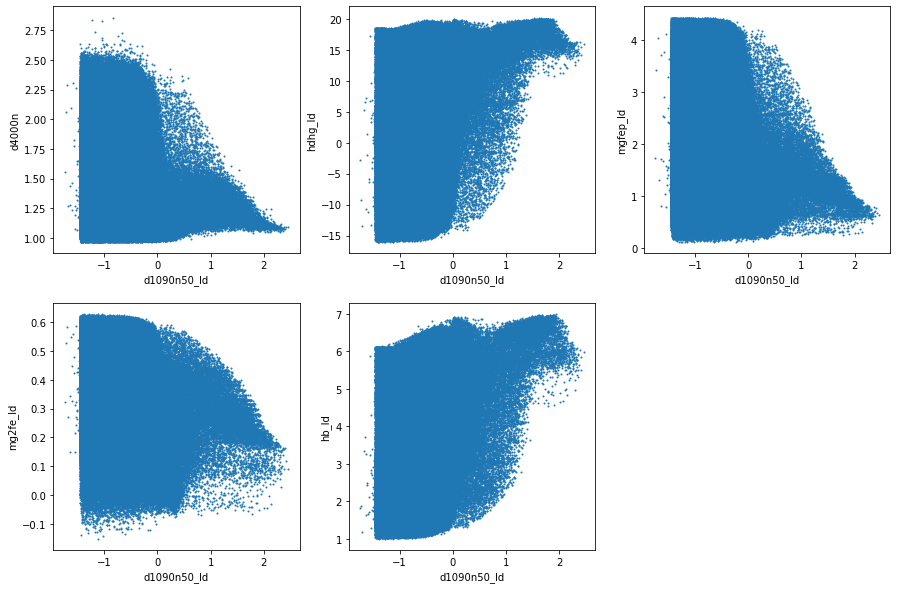

In [5]:
d1090n50_ld=np.log10(age10_ld-age90_ld)-np.log10(age50_ld)
fig_res_tot=f_plt.idx_resol(d1090n50_ld,D4000n_ld,hdhg_ld, MgFeP_ld, Mg2Fe_ld, Hb_ld, par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

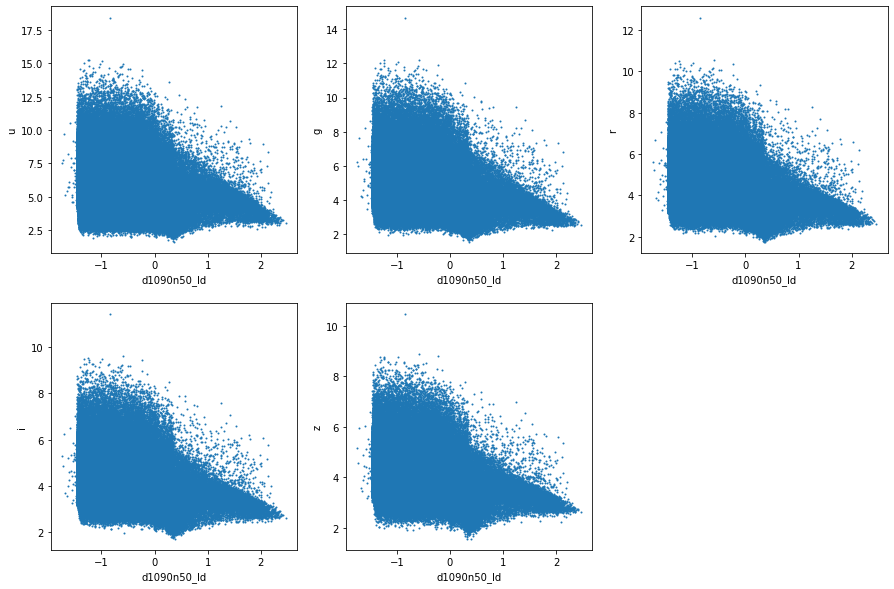

In [6]:
fig_res_tot_mag=f_plt.idx_resol(d1090n50_ld,mag_u_ld,mag_g_ld, mag_r_ld, mag_i_ld, mag_z_ld, par_name='d1090n50_ld', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

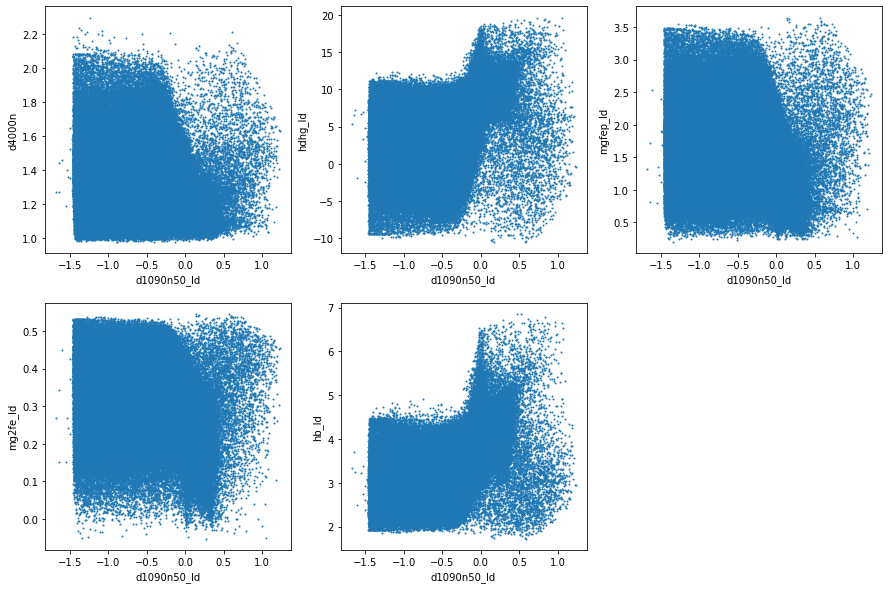

In [7]:
idx_sel=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0))
fig_resol_age=f_plt.idx_resol(d1090n50_ld[idx_sel],D4000n_ld[idx_sel],hdhg_ld[idx_sel], MgFeP_ld[idx_sel], Mg2Fe_ld[idx_sel], Hb_ld[idx_sel], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

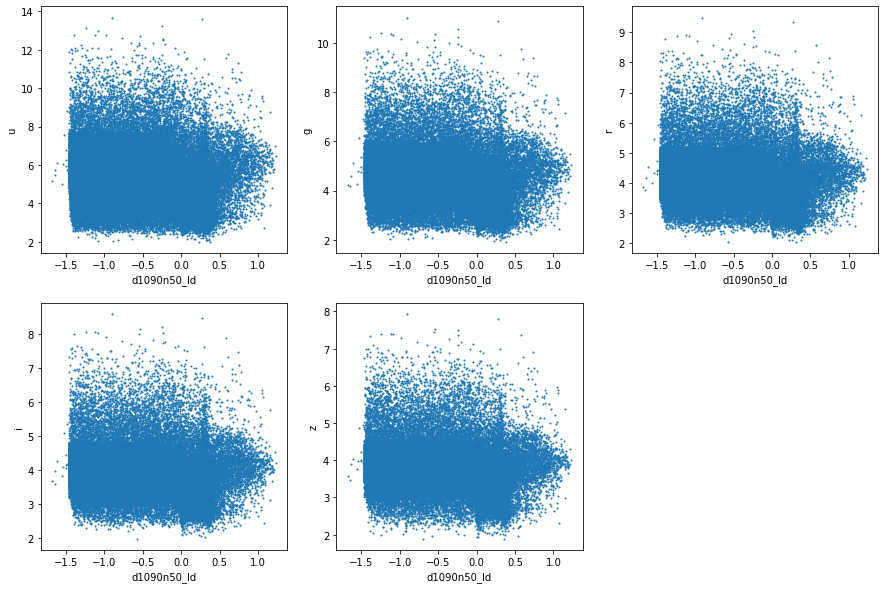

In [8]:
idx_sel=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0))
fig_resol_mag=f_plt.idx_resol(d1090n50_ld[idx_sel],mag_u_ld[idx_sel],mag_g_ld[idx_sel], mag_r_ld[idx_sel], mag_i_ld[idx_sel], mag_z_ld[idx_sel], par_name='d1090n50_ld', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

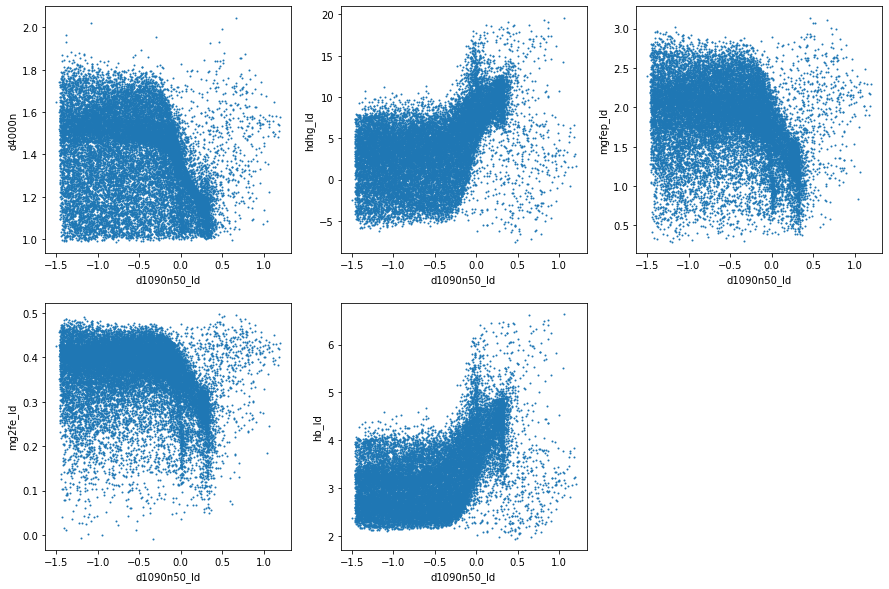

In [9]:
idx_sel=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1))
fig_resol_age=f_plt.idx_resol(d1090n50_ld[idx_sel],D4000n_ld[idx_sel],hdhg_ld[idx_sel], MgFeP_ld[idx_sel], Mg2Fe_ld[idx_sel], Hb_ld[idx_sel], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

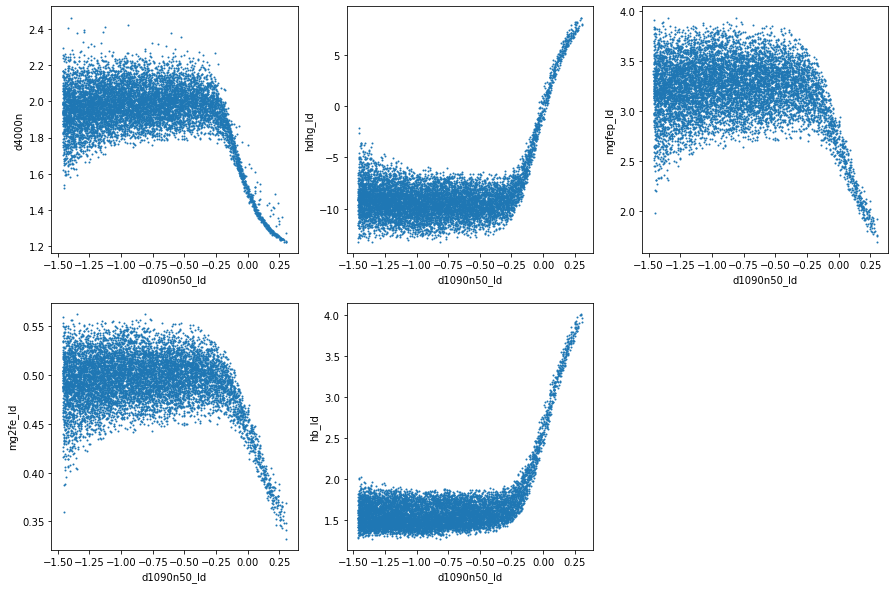

In [10]:
idx_sel=((np.log10(age50_ld) > 9.8)  & (abs(mfwz_ld)<0.1) &(N_bursts==0))
fig_resol_age=f_plt.idx_resol(d1090n50_ld[idx_sel],D4000n_ld[idx_sel],hdhg_ld[idx_sel], MgFeP_ld[idx_sel], Mg2Fe_ld[idx_sel], Hb_ld[idx_sel], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

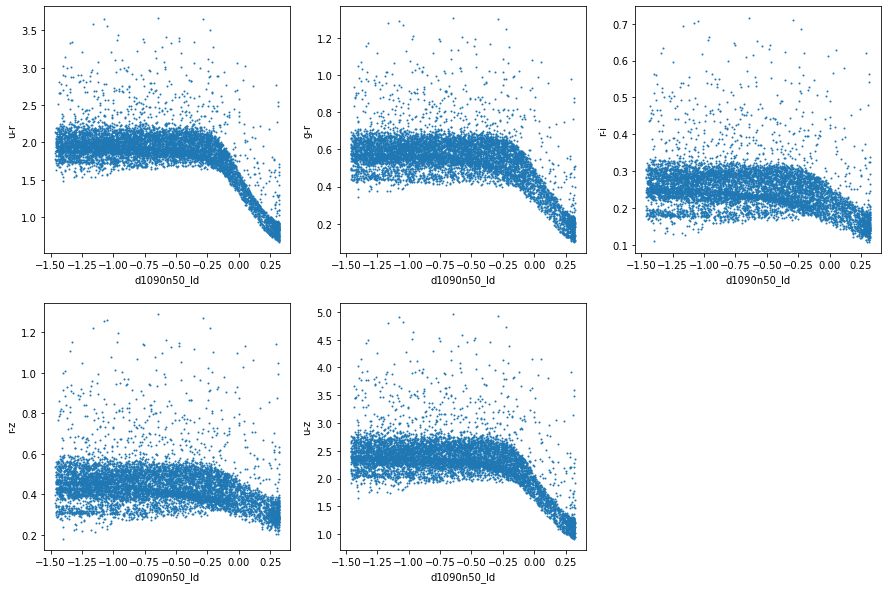

In [11]:
idx_sel=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
fig_resol_mag=f_plt.idx_resol(d1090n50_ld[idx_sel],mag_u_ld[idx_sel]-mag_r_ld[idx_sel],mag_g_ld[idx_sel]-mag_r_ld[idx_sel], mag_r_ld[idx_sel]-mag_i_ld[idx_sel], mag_r_ld[idx_sel]-mag_z_ld[idx_sel], mag_u_ld[idx_sel]-mag_z_ld[idx_sel], par_name='d1090n50_ld', idx_name=['u-r', 'g-r', 'r-i', 'r-z', 'u-z'], figsize=(15,10))

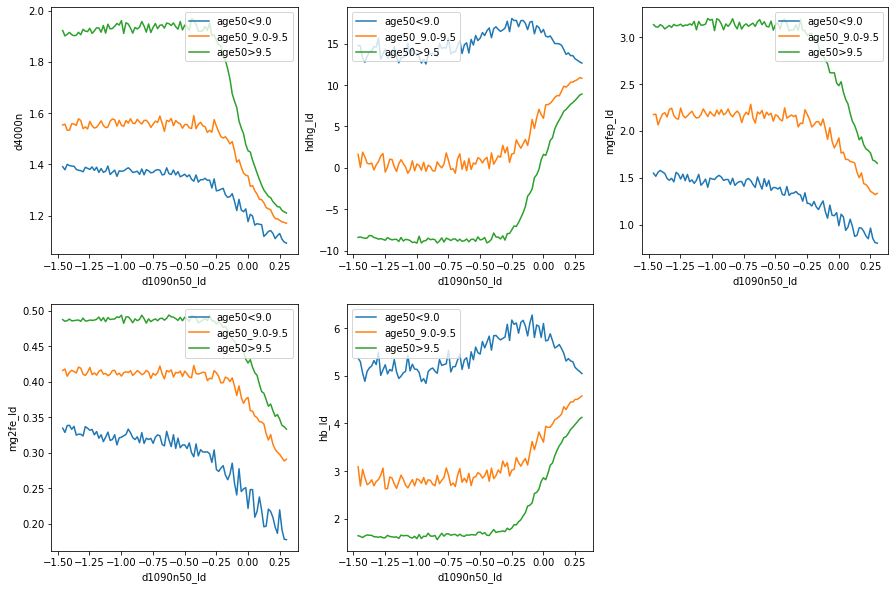

In [12]:
idx_sel1=((np.log10(age50_ld) <9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel2=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel3=((np.log10(age50_ld) >9.5) & (abs(mfwz_ld)<0.1) &(N_bursts==0))

fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50_ld,idx_sel1,idx_sel2,idx_sel3,D4000n_ld,hdhg_ld, MgFeP_ld, Mg2Fe_ld, Hb_ld, x_name='d1090n50_ld',par_name=['age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'],bins=100, figsize=(15,10))

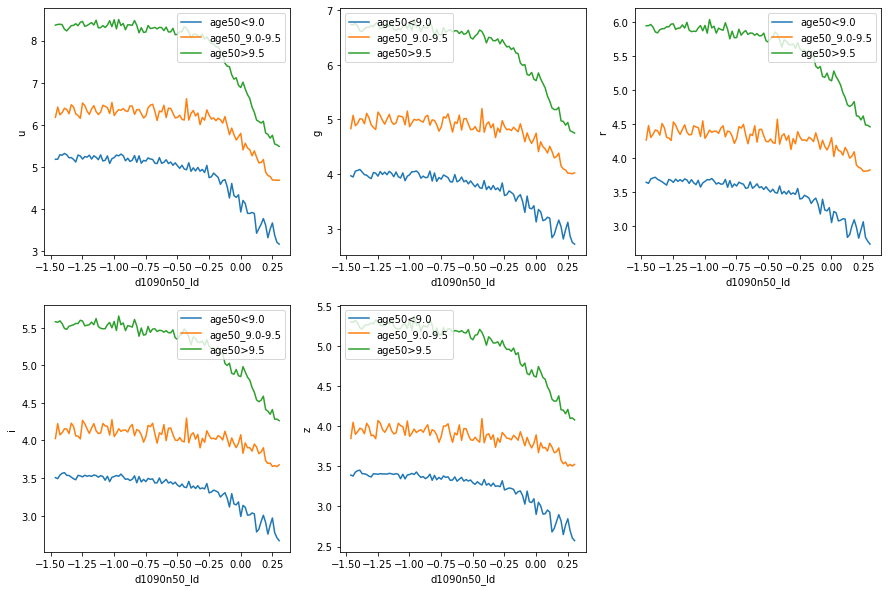

In [13]:
idx_sel1=((np.log10(age50_ld) <9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel2=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel3=((np.log10(age50_ld) >9.5) & (abs(mfwz_ld)<0.1) &(N_bursts==0))

fig_resol3_mag=f_plt.idx_resol_stat4(d1090n50_ld,idx_sel1,idx_sel2,idx_sel3,mag_u_ld,mag_g_ld, mag_r_ld, mag_i_ld, mag_z_ld, x_name='d1090n50_ld',par_name=['age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['u', 'g', 'r', 'i', 'z'],bins=100, figsize=(15,10))

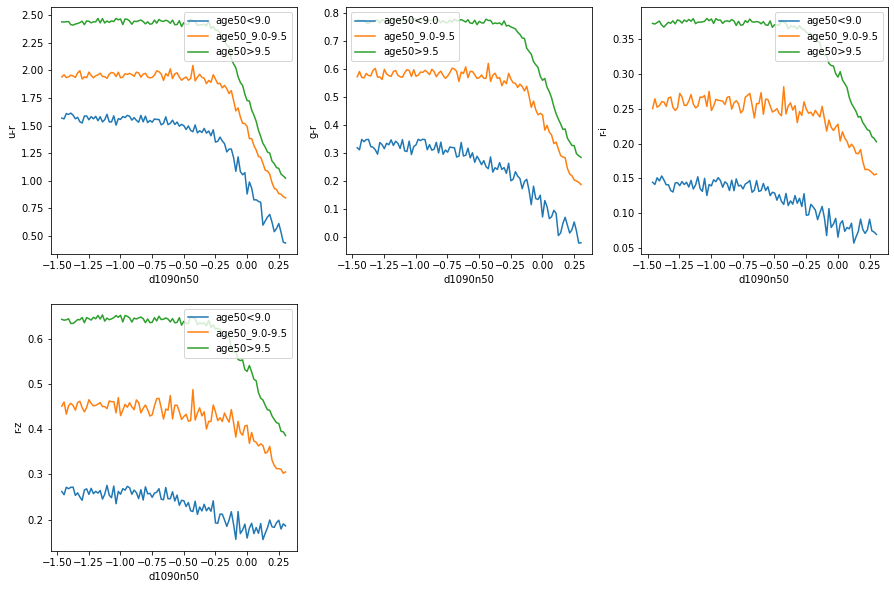

In [17]:
idx_sel1=((np.log10(age50_ld) <9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel2=((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1) &(N_bursts==0))
idx_sel3=((np.log10(age50_ld) >9.5) & (abs(mfwz_ld)<0.1) &(N_bursts==0))

fig_resol_col=f_plt.idx_resol_stat4col(d1090n50_ld,idx_sel1,idx_sel2,idx_sel3,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld,figsize=(15,10), bins=100)

array([0.14363508])

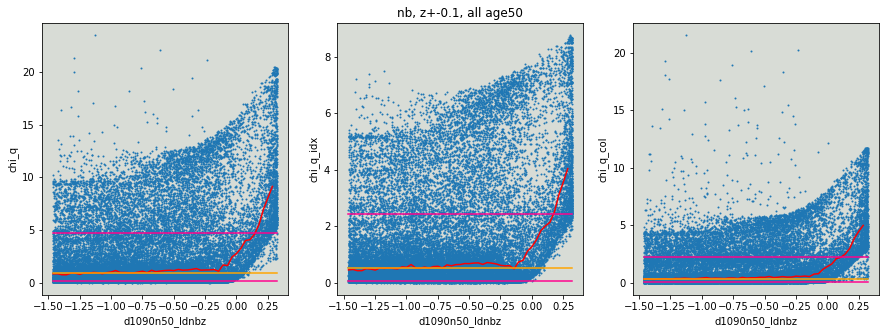

In [18]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)
fig_tot, par_lim=f_plt.chi_q(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,5), title='nb, z+-0.1, all age50')
par_lim

array([-0.14131185])

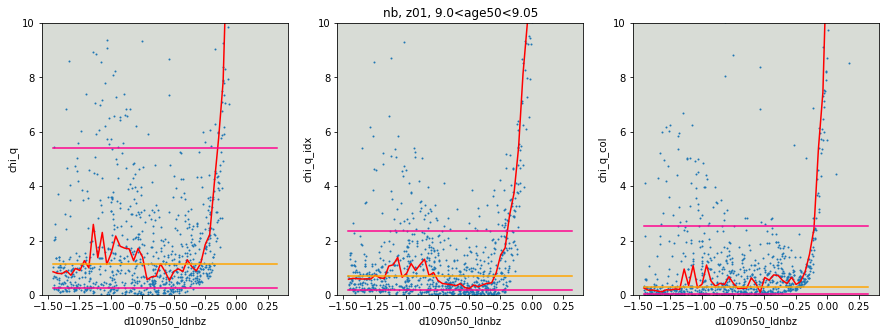

In [19]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
fig_905col, par_lim=f_plt.chi_q(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,5), title='nb, z01, 9.0<age50<9.05', ylim=[0.0,10.0],toll=0.6)
par_lim #togli u-z

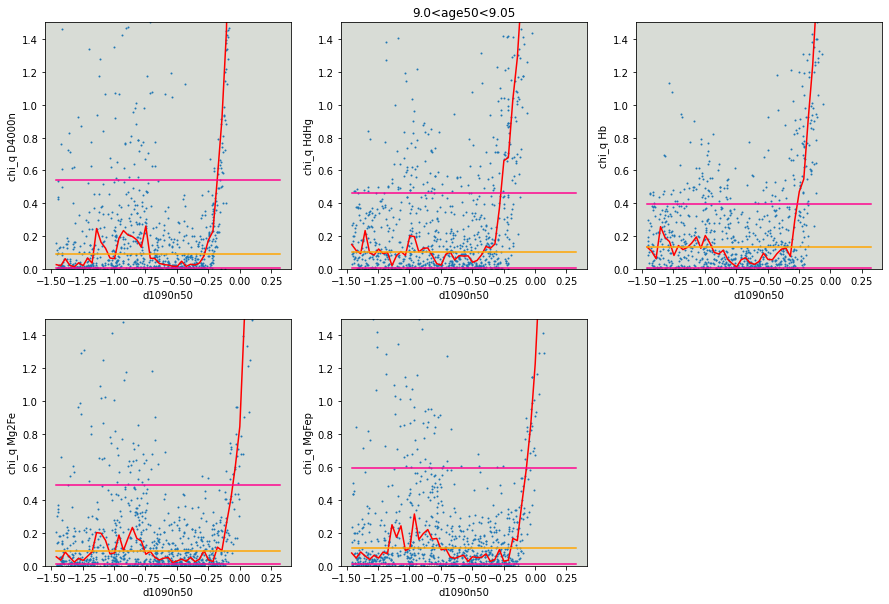

In [20]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
fig905_comp=f_plt.chi_q_comp_idx(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld, idx_sel,idx_ref,figsize=(15,10), title='9.0<age50<9.05', ylim=[0.0,1.5])

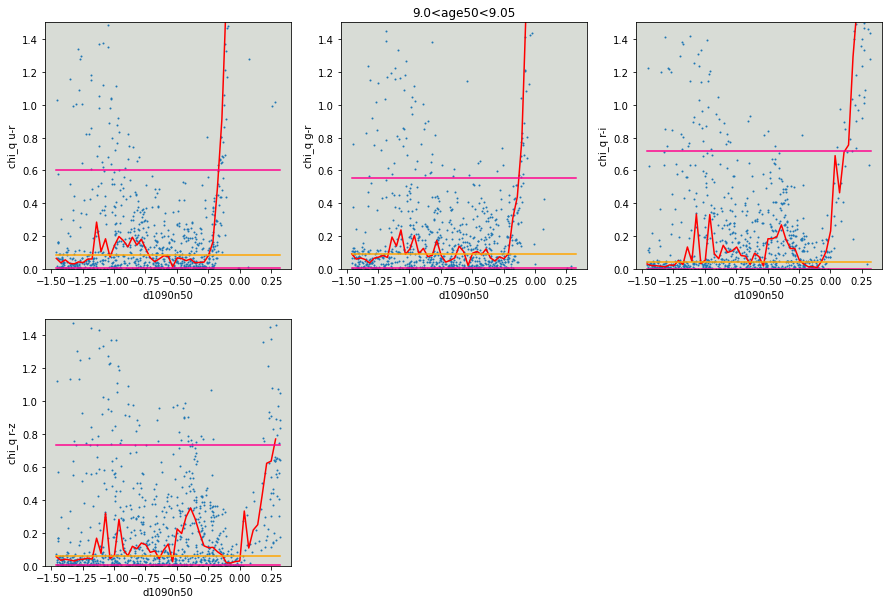

In [21]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.05)& (np.log10(age50_ld)>9.0)
fig905_comp_col=f_plt.chi_q_comp_col(d1090n50_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,10), title='9.0<age50<9.05', ylim=[0.0,1.5])

array([-0.1765942])

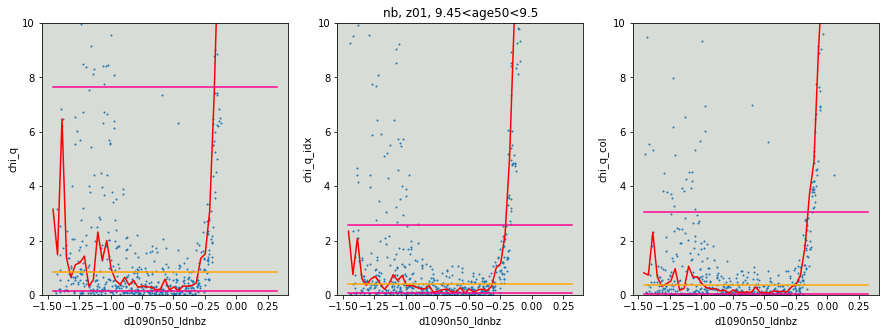

In [22]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
fig_95col, par_lim=f_plt.chi_q(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,5), title='nb, z01, 9.45<age50<9.5', ylim=[0.0,10.0],toll=0.4)
par_lim

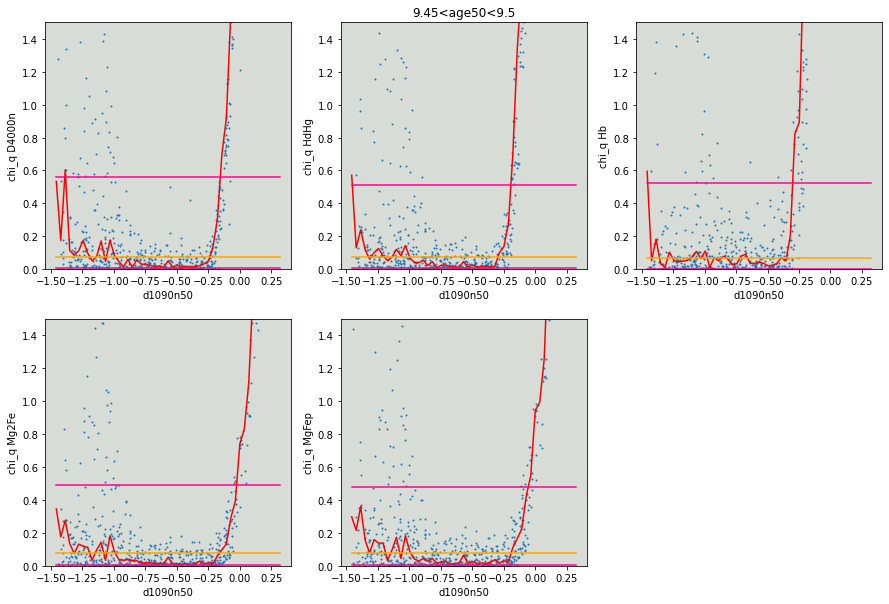

In [23]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
fig95_comp=f_plt.chi_q_comp_idx(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld, idx_sel,idx_ref,figsize=(15,10), title='9.45<age50<9.5', ylim=[0.0,1.5])

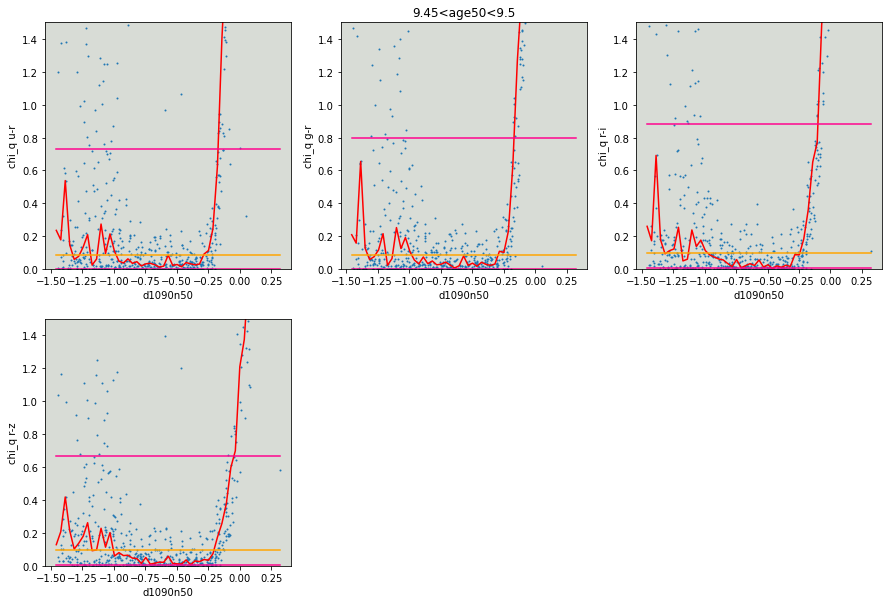

In [24]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.5)& (np.log10(age50_ld)>9.45)
fig95_comp_col=f_plt.chi_q_comp_col(d1090n50_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,10), title='9.45<age50<9.5', ylim=[0.0,1.5])

array([-1.42407646, -1.10344219])

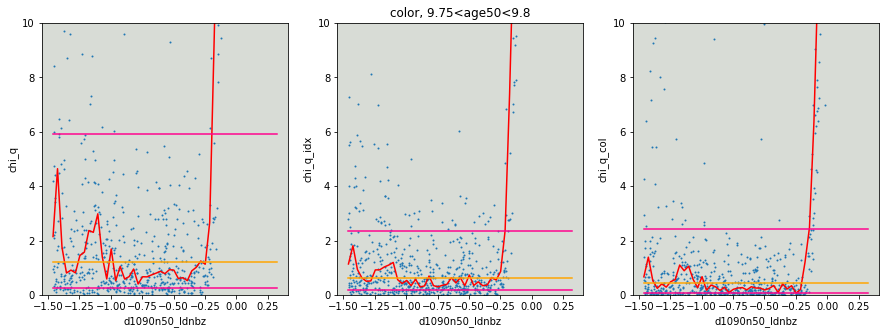

In [25]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
fig9798col, par_lim=f_plt.chi_q(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,5), title='color, 9.75<age50<9.8', ylim=[0.0,10.0], toll=3)
par_lim

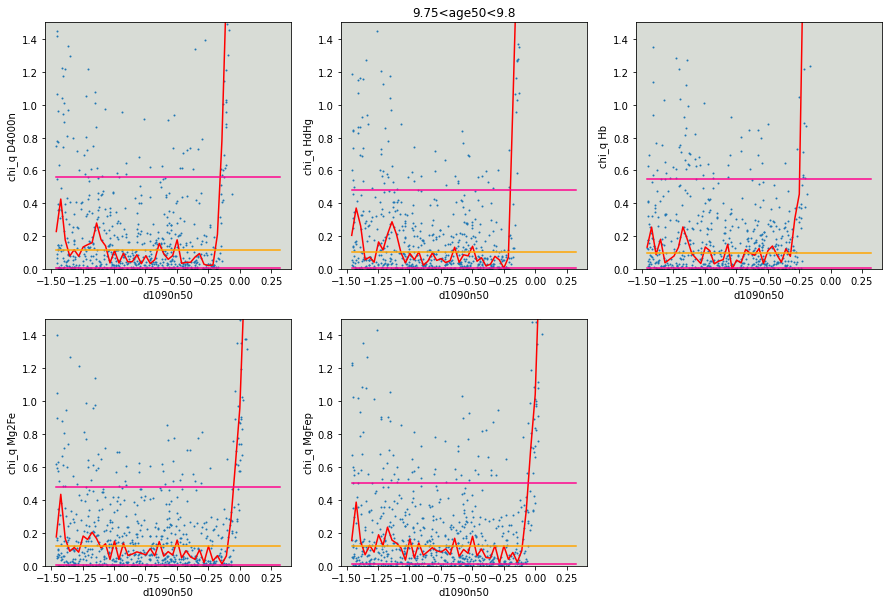

In [26]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
fig9798_comp=f_plt.chi_q_comp_idx(d1090n50_ld,D4000n_ld,hdhg_ld,Hb_ld,Mg2Fe_ld,MgFeP_ld, idx_sel,idx_ref,figsize=(15,10), title='9.75<age50<9.8', ylim=[0.0,1.5])

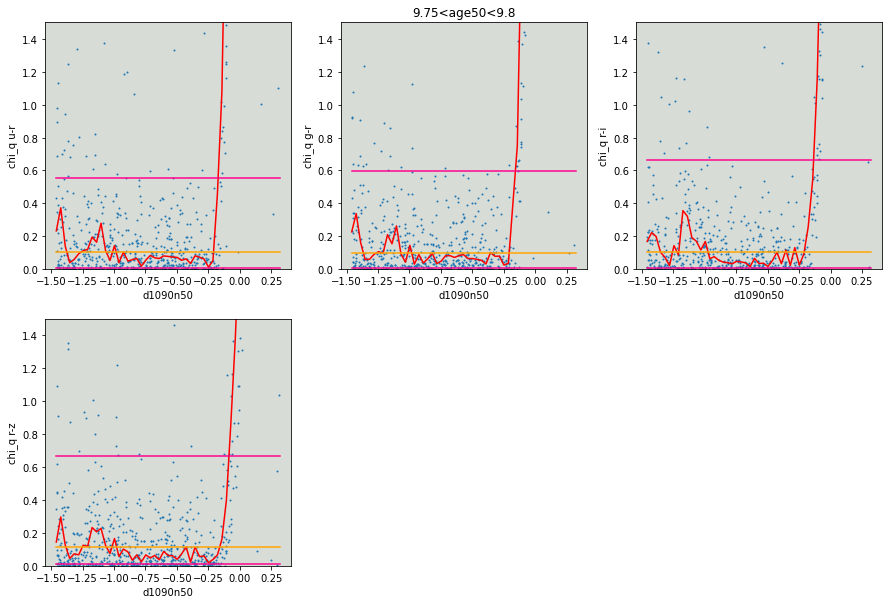

In [27]:
idx_ref=(d1090n50_ld<-0.75)&(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
idx_sel=(N_bursts==0)&(abs(mfwz_ld)<0.1)&(np.log10(age50_ld)<9.8)& (np.log10(age50_ld)>9.75)
fig9798_comp=f_plt.chi_q_comp_col(d1090n50_ld,mag_u_ld-mag_r_ld,mag_g_ld-mag_r_ld, mag_r_ld-mag_i_ld, mag_r_ld-mag_z_ld, idx_sel,idx_ref,figsize=(15,10), title='9.75<age50<9.8', ylim=[0.0,1.5])